In [35]:
#import json
import ijson
import simplejson
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
!cat ./reddit-tomt-submissions.jsonl | shuf | head -100000 > json-tomt-sample.jsonl

shuf: write error: Broken pipe
shuf: write error


In [12]:
!cat json-tomt-sample.jsonl | wc -l

100000


In [16]:
df = pd.read_json("./json-tomt-sample.jsonl", lines=True)

In [22]:
df['category'] = df.apply(lambda i: extract_category(i), axis=1)

In [23]:
df.head(2)

,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,brand_safe,mod_note,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits
0,NaN,self.tipofmytongue,None,1557725027,1557725407,tipofmytongue,{},{},bit of a long shot but [Pocoyo](https://tvtro...,[https://tvtropes.org/pmwiki/pmwiki.php/Wester...,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,0.0,self.tipofmytongue,None,1454487496,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [24]:
df.iloc[0].to_dict()

{'hide_score': nan,
 'domain': 'self.tipofmytongue',
 'author_flair_text': None,
 'created_utc': 1557725027,
 'solved_utc': 1557725407,
 'subreddit': 'tipofmytongue',
 'media_embed': {},
 'secure_media_embed': {},
 'chosen_answer': 'bit of a long shot but  [Pocoyo](https://tvtropes.org/pmwiki/pmwiki.php/WesternAnimation/Pocoyo)?',
 'links_on_answer_path': ['https://tvtropes.org/pmwiki/pmwiki.php/WesternAnimation/Pocoyo)?'],
 'title': '[TOMT][KID’S SHOW] Nick Jr. claymation show?',
 'thumbnail': 'self',
 'downs': nan,
 'distinguished': nan,
 'link_flair_text': 'Solved',
 'permalink': '/r/tipofmytongue/comments/bnzd3x/tomtkids_show_nick_jr_claymation_show/',
 'ups': nan,
 'retrieved_on': 1560704934.0,
 'content': 'I have one vague memory of a claymation kid’s show. It had a dog character, possibly a kid character(unsure), and a British narrator. I think it also had a penguin character that had a hat that did some crazy things. Also I think the show always took place in a white void. Don’

In [20]:
def extract_category(tomt):
    
    return tomt.to_dict()['title'].split('[')[-1].split(']')[0]

In [26]:
df['category'].value_counts().head(20)

category
TOMT     25066
SONG      4770
MOVIE     4303
Song      3590
Movie     2865
2000s     2665
song      1749
2010s     1693
Video     1619
video     1422
VIDEO     1373
BOOK      1246
MUSIC     1243
Music     1145
Book      1086
movie     1077
GAME       897
tomt       714
Game       662
1990s      515
Name: count, dtype: int64

In [30]:
df[df['category'].str.contains('site')].category.value_counts()

category
Website                                                                                                                    402
website                                                                                                                    371
Game/website                                                                                                                 2
Website?                                                                                                                     2
website/game                                                                                                                 2
                                                                                                                          ... 
Model/Website                                                                                                                1
Late 90s website GAME                                                                                 

In [31]:
df[df['category'].str.contains('page')].category.value_counts()

category
Webpage                                                                                                                                                                            3
web page                                                                                                                                                                           2
webpage                                                                                                                                                                            2
2000 era website that paid users for page views?                                                                                                                                   1
Front page comic submission of two friends reminiscing, having a good time, and it cuts back to the friend and he's not there and the last frame is at the grave of his friend.    1
That app on chrome that lets you manage clickbait to one page                         

<AxesSubplot:>

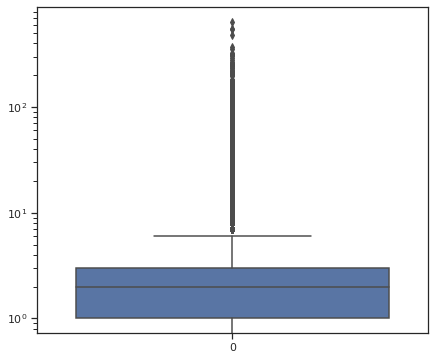

In [38]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(df.ups)
# observation: zero or ten or more upvotes are outlayers, hence we take questions with 1-9 upvotes

<AxesSubplot:>

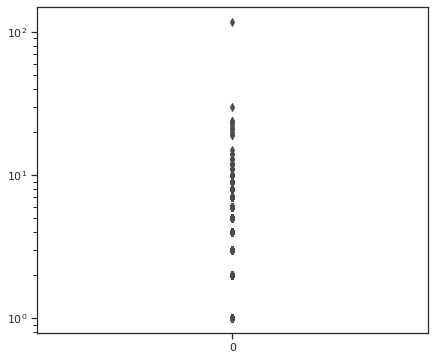

In [41]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(df.downs)
# observation:questions with one downvote are already outlayers, hence we only take questions with zero downvotes

<AxesSubplot:>

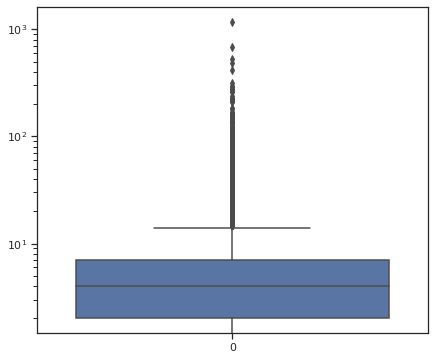

In [42]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(df.num_comments)
# observation:questions with zero or 13 comments are already outlayers, hence we only take questions with zero downvotes

In [43]:
df.num_comments.describe()

count    100000.000000
mean          5.338720
std           8.477454
min          -1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max        1170.000000
Name: num_comments, dtype: float64

In [44]:
df.num_comments.quantile(q=0.95)

13.0